<a href="https://colab.research.google.com/github/christianeloysio/Data_Science/blob/main/Is_there_life_outside_Excel_Spreadsheets%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Is there life outside Excel Spreadsheets?
#### **San Francisco Airbnb Data Analysis Using Python**
*by [Christian Eloysio](https://www.linkedin.com/in/christianeloysio/)* 

---
<br/>

While intuition played a major role in 20th-century businesses, data came to show a better way. Data-driven decisions have been proving their ground under the complexity of today´s world. Data is so good that we could say that "Data is the new bacon". But I'm a vegetarian. So, "Data is new Tofu", I guess?

Even though data analysis is extremely important, we still rely heavily on excel spreadsheets due it´s simplicity. I´m not saying that Excel isn't a great tool. It is. But as technology evolved, we have low-code/no-code tools that make faster and stronger analyses possible.

<center><img alt="Analisando Airbnb" width="30%" src="https://miro.medium.com/max/624/1*FAzumPnvzKUDolMG7SNcHw.png"></center>
<br/>

**My objective here is to show how we can, with just a few lines of code, extract relevant insights from datasets.**

To do that I will be *analyzing San Francisco [Airbnb](https://www.airbnb.com.br/) data available at [Inside Airbnb](http://insideairbnb.com/get-the-data.html) Portal*. I will be using `Python` to manipulate the dataset, relying on libraries as `Pandas`, `Searborn`, and `Missingno`.




## About Airbnb
[Airbnb](https://www.airbnb.com.br/) is already considered the *largest hotel company* in the world, even though it ***does not have any hotel buildings***!

Connecting people who travel to hosts who want to rent their properties, Airbnb provides an innovative platform for this hosting alternative.

The startup founded in 2008 already has **more than 150 million users** around the world, challenging traditional hotel chains.

One of Airbnb's initiatives is to provide data for some of the world's major cities. Through the [Inside Airbnb portal](http://insideairbnb.com/get-the-data.html), you can download data to develop *Data Science* projects and solutions.

<center></center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg">

## About San Francisco
San Francisco is one of the top cities in the world when talking about technology. Silicon Valley, the world's most famous center for high technology and innovation, is located in the southern part of the San Francisco Bay Area. It is also well known for its history and touristic attractions, as the Golden Gate Bridge.

The city is located on a peninsula in Nothern California, in the West of the United States. It is divided into five broad districts: Central/downtown, Richmond, Sunset, Upper Market and beyond (south-central), and Bernal Heights/Bayview and beyond (southeast). These districts are divided into smaller neighbourhoods. The San Francisco Planning Department officially identifies 36 of them:

<center></center><img alt=" San Francisco Neighbourhood" width="60%" src="https://uploads-ssl.webflow.com/5db0fce271caa26ad1ca0613/5de674bc5755acb03466100f_SFNeighborhoodMap.jpg">

**In this notebook, we will analyze San Francisco Airbnb data to see what insights can be drawn from raw data.** 

## Data extraction


All analyzed data was extracted from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) Portal.

For this initial exploratory data analysis, I chose the following file:
 - `listing.csv` - *Summary information and metrics for listings in San Francisco (good for visualizations).*

</br>

Due to constant updates, I saved the file on my Github, and it´s available [here]("https://raw.githubusercontent.com/christianeloysio/potfolio-data-science/main/datasets/listings.csv").

In [ ]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

%matplotlib inline

In [ ]:
# importing data and transforming it into a Dataframe
df = pd.read_csv("https://raw.githubusercontent.com/christianeloysio/Data_Science/main/datasets/listings.csv")

## Data Analysis


At first, as we would do in excel, we will try to broaden the situational awareness around the dataset. I will leave a dictionary of variables for better understanding.

**Dictionary**

* `id` -  Property unique identifier
* `name` - Property name/description
* `host_id` - Host unique identifier
* `host_name` - Host name
* `neighbourhood_group` - this column has no valid entries and will be deleted
* `neighbourhood` - Propety's neighbourhood name
* `latitude` - Property's latitude
* `longitude` - Property's longitude
* `room_type` - Type of accomodation that is offered (Entire home/apt, Private room, etc)
* `price` - property's price per night
* `minimum_nights` - Property's minimum nights  
* `number_of_reviews` - Property's reviews count
* `last_review` - Last review date
* `reviews_per_month` - Number of reviwes per month
* `calculated_host_listings_count` - Number of propeties from the same host
* `availability_365` - Available days in the last 365 days


Let's take a look at the first entries of the dataset:



In [ ]:
# displaying the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,160,2,291,2021-07-29,3.50,1,129
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.78,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,365


### **Q1. How many variables and entries do our dataset contains? What are the types of the variables?**




In [ ]:
# identifying dataset volume
print("Entries:\t {}".format(df.shape[0]))
print("Variables:\t {}\n".format(df.shape[1]))

# verifying dataset variables types
df.dtypes


Entries:	 6611
Variables:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

As we can see above, our dataset contains *6611 entries* spread through *16 different columns (variables)*. 

<br/>

Regarding the type of each variable, it is important to check if the numeric columns have the proper corresponding type. Otherwise, calculations won't be possible.

### **Q2. What is the missing value percentage in each variable?**

Using the `missingno` library, we can first visualize the missing values in each variable. Each white line represents a missing value.

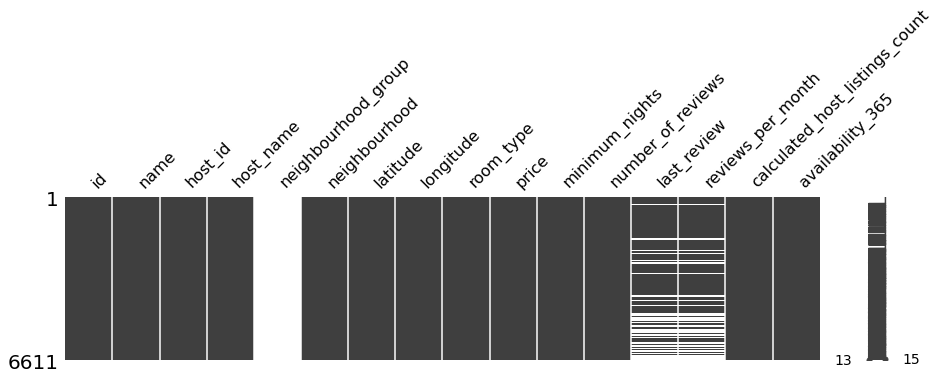

In [ ]:
#visualzing the dataset missing values
msno.matrix(df, figsize=(15,3));

As we can see, the `neighbourhood_group` variable has no values, and the `last_review` and `review_per_month` variables both have some missing values.

Afterward, we can check the percentage of missing values in each column:

In [ ]:
# sorting the missing value percentage per column
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.232189
last_review                       0.232189
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

The whole `neighbourhood_group` variable is missing, while the `reviews_per_month` and `last_review` variables both have 23% of their values missing.

### **Q3. What is the distribution of the variables?** 

To check the distribution of the variables, I will plot the histogram for the numeric variables:

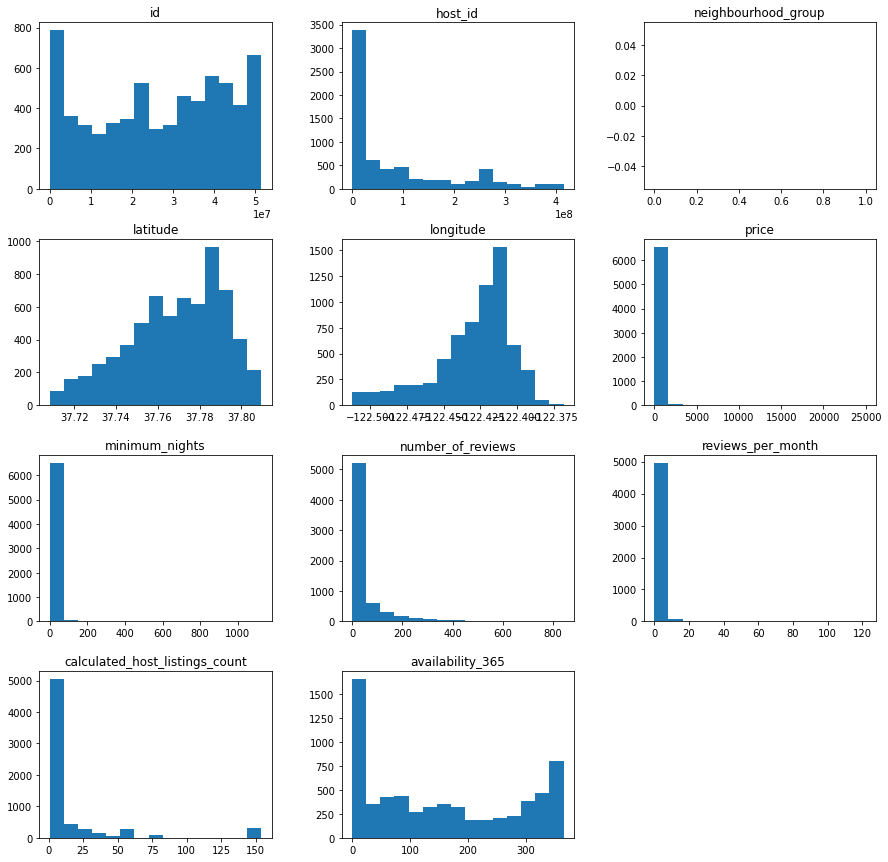

In [ ]:
# plot the histogram for numeric variables
df.hist(bins=15, figsize=(15,15), grid=False);

As it is shown, some variables as `minimum_nights` and `price` have uneven distributions. That is probably due to the outliers in the dataset. Hence, we will delete those in the next step.

### **Q4. Are there Outliers on the Dataset?**

An Outlier is an observation that lies at an abnormal distance from other values in a random sample from a population. In other words, it´s a piece of data that is so different from the rest that can unbalance the results of our analysis.
Thus, to have a more precise dataset, we will seek to remove the outliers.

<br/>

Let´s first take a look at a statistical summary for the dataset:



In [ ]:
# Checking the statistical sumamry for the numerical variables
df.describe() 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.611000e+03,6.611000e+03,0.0,6611.000000,6611.000000,6611.000000,6611.000000,6611.000000,5076.000000,6611.000000,6611.000000
mean,2.668582e+07,8.317538e+07,NaN,37.768470,-122.429273,234.894570,19.566178,42.713508,1.702455,15.174255,155.293450
std,1.608668e+07,1.077564e+08,NaN,0.022811,0.026761,694.216581,32.817765,82.658374,3.802502,33.001965,131.539362
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.251107e+07,4.430421e+06,NaN,37.753175,-122.442230,95.000000,2.000000,1.000000,0.200000,1.000000,24.000000
50%,2.816403e+07,2.541633e+07,NaN,37.771790,-122.422940,149.000000,30.000000,6.000000,0.680000,2.000000,133.000000
75%,4.085804e+07,1.242665e+08,NaN,37.787405,-122.410020,245.000000,30.000000,43.000000,2.000000,10.000000,292.000000
max,5.143887e+07,4.149258e+08,NaN,37.809540,-122.368230,25000.000000,1125.000000,841.000000,122.080000,154.000000,365.000000


Let´s take a closer look at the `price` variable:
* Although 75% of the entries are under 245, the maximum value is 25000.
* The minimum value is 0, which is impossible if someone is renting a property.

Related to the `minimum_nights` variable:
* Although 75% of the entries are below 30, the maximum value is 1125.
* The median (50%) is equal to the 75th percentile (75%). There's probably a strong concentration of data among this value.

To visualize the outliers in the dataset, we can plot the "boxplot".

Long story short, the black dots represent outliers.

<br/>

Plotting the boxplot for `price`:




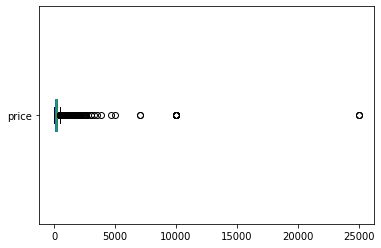

In [ ]:
df.price.plot(kind="box", vert=False);

Plotting the boxplot for `minimum_nights`:

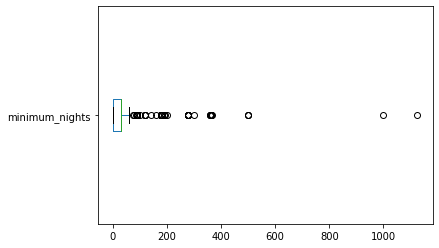

In [ ]:
df.minimum_nights.plot(kind="box", vert=False);

Reaffirming what we saw in the statistical summary, in both cases (`price` and `minimum_nights`) there are values that lie at an abnormal distance from other values, and will be considered as outliers in this analysis.

<br/>

There are different methods to mathematically identify the outliers. Here, we will identify them using the IQR Score, explained in the image below:


<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


In a nutshell:
* IQR = 75th Percentile - 25th Percentile
* Superior limit = IQR + 1,5*IQR
* Inferior limit = IQR - 1,5*IQR

The outliers are the values above the superior limit or below the inferior limit. These are the ones that should be deleted.




####Identifying the Outliers


Calculating IQR, superior limit, and inferior limit for the `price` variable:

In [ ]:
# Calculating the IQR
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print("IQR for price:\t {}".format(IQR_price))

# Calculating the limits
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print("Superior limit for price:\t {}".format(sup_price))
print("Inferior limit for price:\t {}".format(inf_price))

IQR for price:	 150.0
Superior limit for price:	 470.0
Inferior limit for price:	 -130.0


As we can't have negative values for price, nor values that are equal to 0, only values greater than zero and below the superior limit should be considered.

<br/>

Now, let´s check the percentage of values that are equal to 0, or above the superior limit:

In [ ]:
print("% Equal to 0: \t {}%".format((df[df.price == 0].shape[0]/df.shape[0])*100))
print("% Greater than superior limit: \t {}%".format((df[df.price > sup_price].shape[0]/df.shape[0])*100))

% Equal to 0: 	 0.030252609287551052%
% Greater than superior limit: 	 7.018605354711843%


Deleting the outliers from the dataset:

In [ ]:
# copying the dataset
df_clean = df.copy()

# deleting entries from the clean dataset
df_clean.drop(df_clean[df_clean.price == 0].index, inplace=True)
df_clean.drop(df_clean[df_clean.price > sup_price].index, inplace=True)

print("Initial number of entries: {}".format(df.shape[0]))
print("Entries after cleaning price: {}".format(df_clean.shape[0]))

Initial number of entries: 6611
Entries after cleaning price: 6145


Running the same process for `minimum_nights`:

In [ ]:
# Calculating the IQR
q1_mn = df.minimum_nights.quantile(.25)
q3_mn = df.minimum_nights.quantile(.75)
IQR_mn = q3_mn - q1_mn
print("IQR for minimum_nights:\t {}".format(IQR_mn))

# Calculating the limits
sup_mn = q3_mn + 1.5 * IQR_mn
inf_mn = q1_mn - 1.5 * IQR_mn

print("Superior limit for minimun_nights:\t {}".format(sup_mn))
print("Inferior limit for minimun_nights:\t {}".format(inf_mn))

IQR for minimum_nights:	 28.0
Superior limit for minimun_nights:	 72.0
Inferior limit for minimun_nights:	 -40.0


In [ ]:
print("% Greater than superior limit: \t {}%".format((df[df.minimum_nights > sup_mn].shape[0]/df.shape[0])*100))

% Greater than superior limit: 	 1.6487672061715322%


In [ ]:
# deleting entries from the clean dataset
df_clean.drop(df_clean[df_clean.minimum_nights > sup_mn].index, inplace=True)

print("Entries after cleaning minimum_nights and price: {}".format(df_clean.shape[0]))


Entries after cleaning minimum_nights and price: 6042


Finally, let´s look at the distribution for `price` and `minimum_nights` before and after cleaning the outliers:

`price` before cleaning outliers:

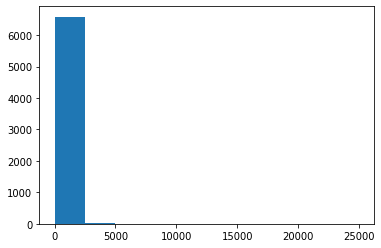

In [ ]:
df.price.hist(grid=False);

`price` after cleaning outliers:

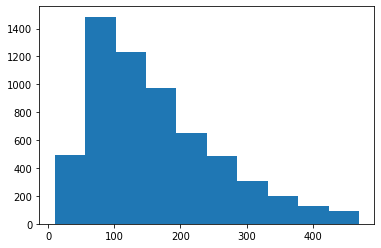

In [ ]:
df_clean.price.hist(grid=False);

`minimum_nights` before cleaninig outliers:

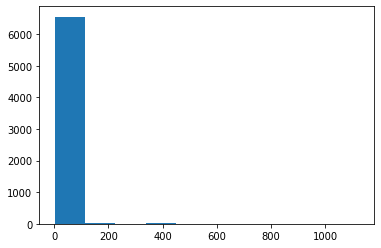

In [ ]:
df.minimum_nights.hist(grid=False);

`minimum_nights` after cleaning outliers:

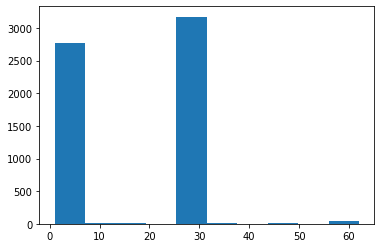

In [ ]:
df_clean.minimum_nights.hist(grid=False);

To keep the dataset cleaner, let's also delete the `neighbourhood_group` variable since it has no valid values:




In [ ]:
df_clean.drop(["neighbourhood_group"], axis=1, inplace=True)

After treating the dataset, this is the new statistical summary:

In [ ]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.042000e+03,6.042000e+03,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000,4696.000000,6042.000000,6042.000000
mean,2.674639e+07,8.371172e+07,37.767866,-122.429487,161.339788,17.437934,45.112049,1.766327,16.136379,156.684707
std,1.603829e+07,1.076545e+08,0.022893,0.027103,93.858924,14.327115,85.492221,3.899768,34.135255,130.982539
min,9.580000e+02,1.169000e+03,37.708370,-122.512460,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.285966e+07,4.430421e+06,37.752455,-122.442687,90.000000,2.000000,1.000000,0.210000,1.000000,28.250000
50%,2.818209e+07,2.665352e+07,37.771135,-122.422920,139.000000,30.000000,7.000000,0.720000,2.000000,137.000000
75%,4.095780e+07,1.268622e+08,37.786980,-122.409913,209.000000,30.000000,46.000000,2.120000,12.000000,293.000000
max,5.143887e+07,4.149258e+08,37.809540,-122.368590,470.000000,62.000000,841.000000,122.080000,154.000000,365.000000


Some highlights:
* In `price`, the mean is way closer to the median than before.
* The new maximum `price` value is 470.
* The new maximum `minimum_nights`value is 62.
* Without the outliers, we can have a deeper understanding of the real distribution of data in both `price` and `minimum_nights`.


As we initial stated:
* There were outliers in `price` affecting our analysis.
* There were outliers in `minimum_nights` affecting our analysis.
* There is a concentration of `minimum_nights` data among 30 days. A hypothesis for this would be that people in San Francisco generally rent their houses for a specific season that is a month-long. That can be analyzed with further research, which is not in the scope of this study.

### **Q4. What is the correlation between variables?**

A correlation implies that there is a relation between two variables in the dataset.

This relation can be measured, and we will be doing that by:
- Creating a correlation matrix.
- Creating a heatmap using the `seaborn` library.

In [ ]:
# creating the correlation matrix

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.229879,-0.046057,-0.005828,-0.012800,-0.076349
minimum_nights,-0.229879,1.000000,-0.359074,-0.275706,0.132941,0.286355
number_of_reviews,-0.046057,-0.359074,1.000000,0.358509,-0.173157,-0.032363
reviews_per_month,-0.005828,-0.275706,0.358509,1.000000,-0.116680,-0.004602
calculated_host_listings_count,-0.012800,0.132941,-0.173157,-0.116680,1.000000,0.080011
availability_365,-0.076349,0.286355,-0.032363,-0.004602,0.080011,1.000000


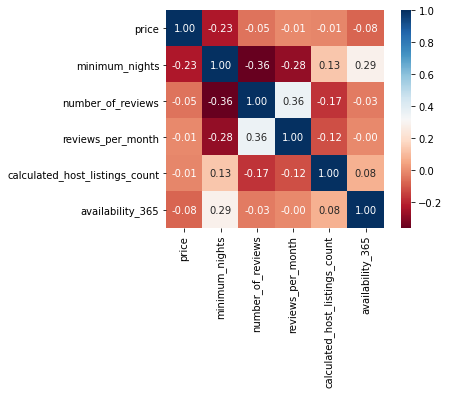

In [ ]:
# ploting the heatmap
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

As it can be observed, there is no strong correlation between the variables that were listed above.

### **Q5. What is the most common room type?**

If we were going to rent a property in San Francisco, it would be useful to know which type is the most common one. 

<br/>

We can run an analysis in the  `room_type` variable to address this question.

In [ ]:
# display the amount entries in each type
df_clean.room_type.value_counts()

Entire home/apt    3660
Private room       2135
Shared room         171
Hotel room           76
Name: room_type, dtype: int64

In [ ]:
# percentage of each available type
df_clean.room_type.value_counts()/df_clean.shape[0]


Entire home/apt    0.605760
Private room       0.353360
Shared room        0.028302
Hotel room         0.012579
Name: room_type, dtype: float64

Running this analysis, we could notice that 60% of the rentals in San Francisco are Entire home/apt, which might explain the reason why the minimum nights for a great part of the locations are 30 days: people are generally looking for a place to live and pay a monthly rent.

<br/>

Even though the majority of locations offered are Entire home/apt, that does not mean that this is the one that is mostly rented. We can investigate that by checking the median value for `availabiblty_365` in each room type:


In [ ]:
#Checking the avalabity median in each room type
df_clean.groupby(by="room_type").availability_365.median().sort_values()

room_type
Private room       124
Entire home/apt    140
Hotel room         194
Shared room        209
Name: availability_365, dtype: int64

While Entire home/apt is the most common type offered, private room is the least available one. That may indicate that there is greater demand for this type of room in San Francisco.

### **Q6. What is the most expensive neighborhood in San Francisco?**



When renting a place to stay, price is generally one of the top concerns. 


Let´s check the mean price per neighbourhood:

In [ ]:
# prices per neighbourhood

df_clean.groupby(by="neighbourhood").price.mean().sort_values(ascending=False)[:10]

neighbourhood
Twin Peaks             215.065217
Marina                 199.708333
Castro/Upper Market    198.070866
Potrero Hill           197.846154
Glen Park              192.234043
Presidio               191.857143
Chinatown              186.187050
South of Market        185.183771
Golden Gate Park       183.750000
Noe Valley             179.712329
Name: price, dtype: float64

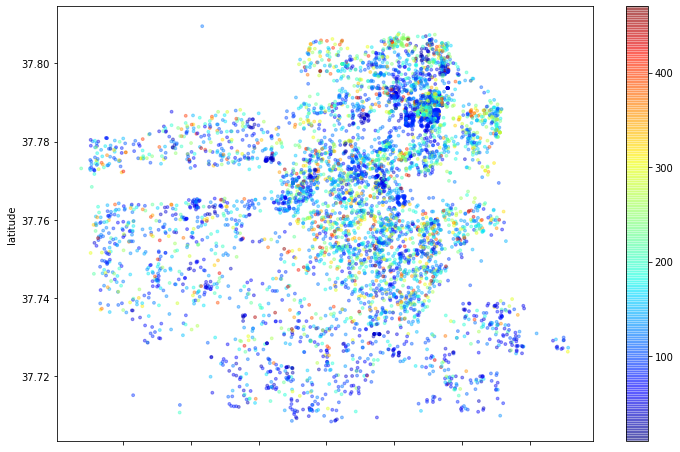

In [ ]:
# plotting the propeties by their latitude and longitude, and colouring them by price
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));


According to the analysis above, although places like Twin Peaks and Marina can be expensive and have the highest mean price, we can still find cheaper places to stay in these areas.

## Conclusions


With just a few lines of code we were able to:
- Import data and all the necessary libraries.
- Discover that our dataset has 16 variables and more than 6000 entries.
- Discover that the variable `neighbourhood_group` has no valid values.
- Calculate and delete outliers for `price` and `minimum_nights`.
- Understand the real distribution for `price` and `minimum_nights`.
- Check the correlation between variables.
- Discover that while the most common `room_type` is Entire room/apt, the least available one is Private room.
- Discover that Twin Peaks has the highest price mean among the neigbourhoods in San Francisco.


This is just the tip of the Iceberg. I hope the power of an analysis using `Python` is clear. 

If "Data is the new bacon", you need proper silverware to taste all the flavor of it. Excel can certainly be useful in some cases, but tools like `Python` will help you to extract more value from your data.